<a href="https://colab.research.google.com/github/albertbaezd/data-mining-final-project/blob/develop/Data_Mining_project_code_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.utils import resample
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# import the datasets: -  - Albert: remove comment if you want to manually place the files here. If not, it's going to use a Google Drive folder
# train_data = pd.read_csv("census-income.data.csv") - Albert: remove comment if you want to manually place the files here. If not, it's going to use a Google Drive folder
# test_data = pd.read_csv("census-income.test.csv")  - Albert: remove comment if you want to manually place the files here. If not, it's going to use a Google Drive folder

#Display the contents of the train_data:
#train_data

In [ ]:
'''
Here, we authenticate with Google Drive to add the datafiles from a Drive folder
'''
from google.colab import drive
drive.mount('/content/drive')

train_data = pd.read_csv("/content/drive/My Drive/data-mining-csv-files/census-income.data.csv") #- Albert: remove comment if you want to manually place the files here. If not, it's going to use a Google Drive folder
test_data = pd.read_csv("/content/drive/My Drive/data-mining-csv-files/census-income.test.csv")  #- Albert: remove comment if you want to manually place the files here. If not, it's going to use a Google Drive folder

# Displaying results:

print(train_data)
print(test_data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       age         work-class  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupa

## **Addressing the imbalanced data**

In [ ]:
#Balancing the data:
##Target/Class distribution
x = train_data.drop(["Income-per-year"], axis=1)
y = train_data["Income-per-year"]
y.value_counts()

Income-per-year
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

<Axes: ylabel='count'>

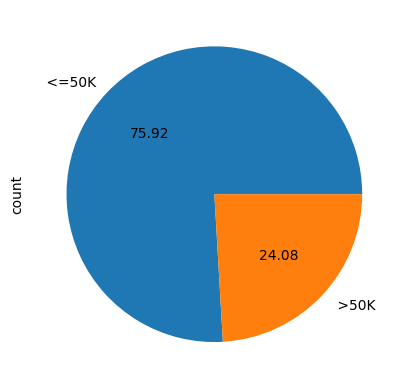

In [ ]:
##Plotting a piechart for the distribution of the class label.
y.value_counts().plot.pie(autopct="%.2f") #below 50k is almost 3 times more than over 50k

1. Undersampling

In [ ]:
#from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler with a sampling strategy of 1 (equalizing the classes)
#rus = RandomUnderSampler(sampling_strategy=1)

# Perform random undersampling on the target variable
#X_resampled, y_resampled = rus.fit_resample(x, y)

# Target/Class distribution after undersampling
#class_distribution_after = y_resampled.value_counts()
#print(class_distribution_after)

Income-per-year
 <=50K    7841
 >50K     7841
Name: count, dtype: int64


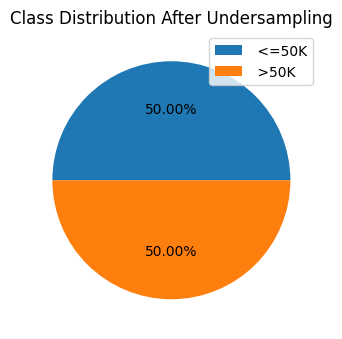

In [ ]:
# Plotting a pie chart for the distribution of the class label after undersampling
#plt.subplot(1, 2, 2)
#class_distribution_after.plot.pie(autopct="%.2f%%", labels=None)
#plt.ylabel('')
#plt.title('Class Distribution After Undersampling')
#plt.legend(labels=class_distribution_after.index, loc='upper right')

#plt.tight_layout()
#plt.show()

2. SMOTE

In [ ]:
## dealing with imbalanced data using SMOTE - daniela
x_train, y_train = train_test_split(x, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy=0.5, random_state=42)
x_train_oversampled, y_train_oversampled = smote.fit_resample(x_train, y_train)

model = LogisticRegression()
model.fit(x_train_oversampled, y_train_oversampled)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))